In [20]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [21]:
# Review city_data
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [22]:
# Review ride_data
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [23]:
# Combine the data into a single dataset
df = pd.merge(ride_data, city_data, how="outer", on=["city"])

# Review merge dataframe
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [24]:
# Get average fare and total ride count per city
df_fare=df.groupby(["city","type"],as_index = False).agg({"fare":"mean","ride_id":"count","driver_count":"max"})
df_fare.head()

,city,type,fare,ride_id,driver_count
0,Amandaburgh,Urban,24.641667,18,12
1,Barajasview,Urban,25.332273,22,26
2,Barronchester,Suburban,36.422500,16,11
3,Bethanyland,Suburban,32.956111,18,22
4,Bradshawfurt,Rural,40.064000,10,7


In [25]:
# Add color column based on city type
city_color = {'Urban':'Coral', 'Suburban':'SkyBlue', 'Rural':'Gold'}
df_fare["color"] = df_fare["type"].map(city_color)
df_fare.rename(columns={'ride_id': 'ride_count','fare':'average_fare'}, inplace=True)

df_fare["color"]= df_fare["type"].map(city_color)
df_fare.head()

,city,type,average_fare,ride_count,driver_count,color
0,Amandaburgh,Urban,24.641667,18,12,Coral
1,Barajasview,Urban,25.332273,22,26,Coral
2,Barronchester,Suburban,36.422500,16,11,SkyBlue
3,Bethanyland,Suburban,32.956111,18,22,SkyBlue
4,Bradshawfurt,Rural,40.064000,10,7,Gold


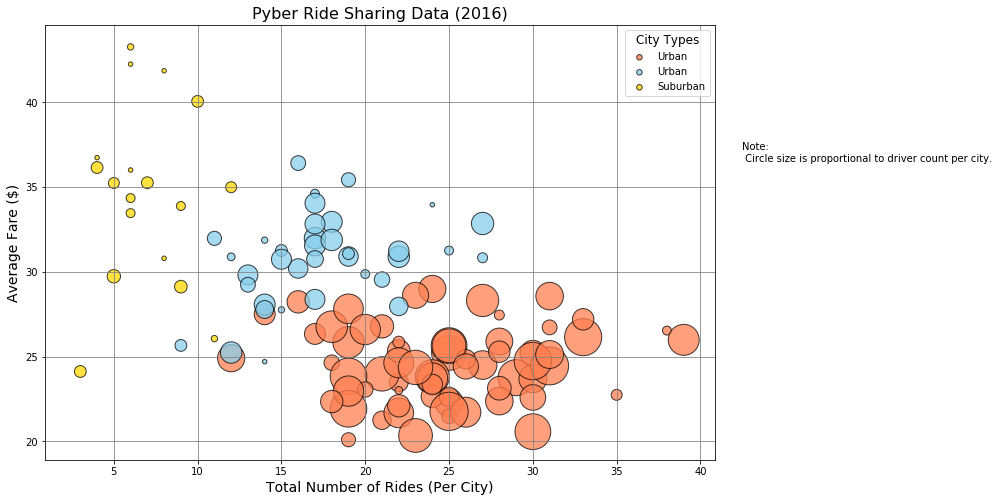

<Figure size 432x288 with 0 Axes>

In [26]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

plt.figure(figsize=(12,8))

city_plot = df_fare.loc[df_fare.type=="Urban"]
plt.scatter( city_plot["ride_count"],city_plot["average_fare"],s=20*city_plot["driver_count"],alpha=.75, marker="o", 
            edgecolors="black", facecolors=city_plot["color"])


city_plot = df_fare.loc[df_fare.type=="Suburban"]
plt.scatter( city_plot["ride_count"],city_plot["average_fare"],s=20*city_plot["driver_count"],alpha=.75, marker="o", 
            edgecolors="black", facecolors=city_plot["color"])

city_plot = df_fare.loc[df_fare.type=="Rural"]
plt.scatter( city_plot["ride_count"],city_plot["average_fare"],s=20*city_plot["driver_count"],alpha=.75, marker="o", 
            edgecolors="black", facecolors=city_plot["color"])

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)', fontsize = 16)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 14)
plt.ylabel("Average Fare ($)", fontsize = 14)
plt.grid(linestyle='-', color = 'gray')

# Create a legend
lgnd = plt.legend(df_fare["type"],title = 'City Types',scatterpoints = 1, title_fontsize = 12, fontsize=10, markerscale =.5)
lgnd.legendHandles[0]._sizes= [30]
lgnd.legendHandles[1]._sizes= [30]
lgnd.legendHandles[2]._sizes= [30]

txt = 'Note:\n Circle size is proportional to driver count per city.'
plt.text(42.5,36.5,txt)

# Save Figure
plt.show()
plt.savefig('data/Pyber_Ride_Sharing_Data.pdf')

## Bubble Plot of Ride Sharing Data

In [27]:
df_city=df.groupby(["type"], as_index = False).agg({"fare":"sum","ride_id":"count"})
total_fares = sum(df_city["fare"])

In [28]:
df_city=df.groupby(["type"], as_index = False).agg({"fare":"sum","ride_id":"count"})

total_fares = sum(df_city["fare"])

df_city["fare_percent"] = df_city["fare"]/total_fares
df_city["color"]= df_city["type"].map(city_color)

df_city.head()

,type,fare,ride_id,fare_percent,color
0,Rural,4327.93,125,0.068115,Gold
1,Suburban,19356.33,625,0.304639,SkyBlue
2,Urban,39854.38,1625,0.627246,Coral


## Total Fares by City Type

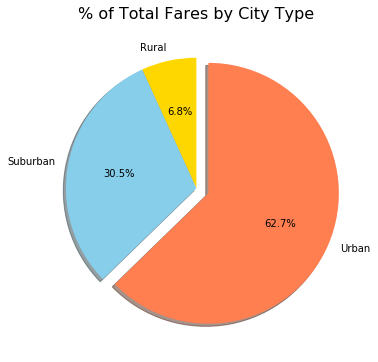

<Figure size 432x288 with 0 Axes>

In [29]:
# Calculate Type Percents

plt.figure(figsize=(10,6))
           
plt.pie(df_city["fare_percent"], labels=df_city["type"], autopct="%1.1f%%", colors=df_city["color"], shadow=True, startangle=90, 
       explode=[0,0,.1]
       )
# Create axes which are equal so we have a perfect circle
#plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.title('% of Total Fares by City Type', fontsize = 16)

# Save Figure
plt.show()
plt.savefig('data/Totals_Fares_By_City_Type.pdf')

In [30]:
df_city=df.groupby(["type"], as_index = False).agg({"fare":"sum","ride_id":"count"})

total_rides = sum(df_city["ride_id"])

df_city["ride_percent"] = df_city["ride_id"]/total_rides
df_city["color"]= df_city["type"].map(city_color)

df_city.head()

,type,fare,ride_id,ride_percent,color
0,Rural,4327.93,125,0.052632,Gold
1,Suburban,19356.33,625,0.263158,SkyBlue
2,Urban,39854.38,1625,0.684211,Coral


## Total Rides by City Type

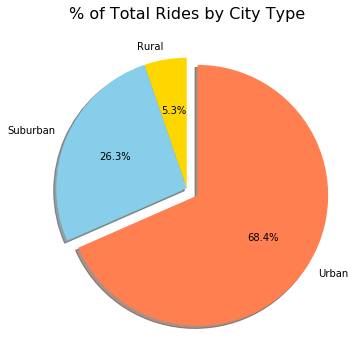

<Figure size 432x288 with 0 Axes>

In [31]:
# Calculate Ride Percents

## Calculate Type Percents

plt.figure(figsize=(10,6))
           
plt.pie(df_city["ride_percent"], labels=df_city["type"], autopct="%1.1f%%", colors=df_city["color"], shadow=True, startangle=90, 
       explode=[0,0,.1]
       )
# Create axes which are equal so we have a perfect circle
#plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.title('% of Total Rides by City Type', fontsize = 16)

# Save Figure
plt.show()
plt.savefig('data/Totals_Rides_By_City_Type.pdf')

## Total Drivers by City Type

In [32]:
# Calculate Driver Percents
df_city=city_data.groupby(["type"], as_index = False).agg({"driver_count":"sum"})

total_drivers = sum(df_city["driver_count"])

df_city["driver_percent"] = df_city["driver_count"]/total_drivers
df_city["color"]= df_city["type"].map(city_color)

df_city.head()

,type,driver_count,driver_percent,color
0,Rural,78,0.026236,Gold
1,Suburban,490,0.164817,SkyBlue
2,Urban,2405,0.808947,Coral


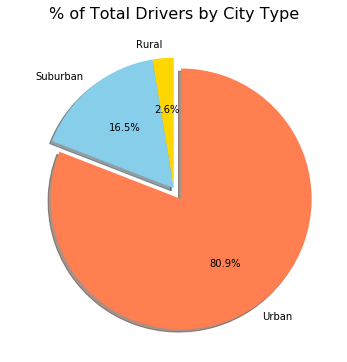

<Figure size 432x288 with 0 Axes>

In [33]:
# Show Figure
plt.figure(figsize=(10,6))
           
plt.pie(df_city["driver_percent"], labels=df_city["type"], autopct="%1.1f%%", colors=df_city["color"], 
        shadow=True, startangle=90, 
       explode=[0,0,.1]
       )

plt.title('% of Total Drivers by City Type', fontsize = 16)

# Save Figure
plt.show()
plt.savefig('data/Totals_Drivers_By_City_Type.pdf')

# Conclusion #
 * Overall fares in rural areas are significant higher than in urban areas.
 * About 80\% or drivers work on urban areas.
 * Over 60\% or revenue comes from rides in urban areas.
 * Rides in urban areas correspond to about 68\% of Pyber rides.